In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Date handling
from datetime import datetime

# Statistical analysis
import scipy.stats as stats
import statsmodels.api as sm


In [7]:
import pandas as pd

# Specify the path to your Excel file
file_path = r'C:\Users\deshp\Downloads\Book6.xlsx'

# Load the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())


                 VIN  TRANSACTION_ID  \
0  3HCFDDE89SH220903           13021   
1  1HRFFEE8XSZ230636           13028   
2  1HYKSMRK6SZ000990           13035   
3  3HCFDFEL3SH241701           13021   
4  1HRFFHEL1RZ181474           13021   

                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   

                                   CUSTOMER_VERBATIM          REPAIR_DATE  \
0                        STEERING WHEEL COMING APART  2024-02-01 00:00:00   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP  2024-03-01 00:00:00   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...  2024-04-01 00:00:00   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...  2024-04-01 00:00:00   
4  C/S: CUSTOMER STATES THE SERVICE D

In [8]:
# Analyze data types, unique values, missing values, and significance of each column

column_analysis = {}

for column in data.columns:
    column_analysis[column] = {
        "Data Type": data[column].dtype,
        "Unique Values": data[column].nunique(),
        "Missing Values": data[column].isnull().sum(),
        "Sample Values": data[column].dropna().unique()[:5].tolist()
    }

# Convert analysis into a DataFrame for better visualization
column_analysis_df = pd.DataFrame(column_analysis).T
column_analysis_df


,Data Type,Unique Values,Missing Values,Sample Values
VIN,object,98,0,"[3HCFDDE89SH220903, 1HRFFEE8XSZ230636, 1HYKSMR..."
TRANSACTION_ID,int64,32,0,"[13021, 13028, 13035, 13026, 13071]"
CORRECTION_VERBATIM,object,93,0,"[REPLACED STEERING WHEEL NOW OKAY, CHECKED - F..."
CUSTOMER_VERBATIM,object,100,0,"[STEERING WHEEL COMING APART, CUSTOMER STATES ..."
REPAIR_DATE,object,29,0,"[2024-02-01 00:00:00, 2024-03-01 00:00:00, 202..."
CAUSAL_PART_NM,object,18,5,"[WHEEL ASM-STRG *JET BLACK, MODULE ASM-STRG WH..."
GLOBAL_LABOR_CODE_DESCRIPTION,object,4,0,"[Steering Wheel Replacement, Heated Steering W..."
PLATFORM,object,11,0,"[Full-Size Trucks, BEV, Global Crossover Vehic..."
BODY_STYLE,object,6,0,"[Crew Cab, 4 Door Utility, 4 Door Sedan, Singl..."
VPPC,object,26,0,"[T1CCF, T1CGF, L233-LSOP, C1UL, A2LL]"


This provides a table summarizing each column's data type, number of unique values, missing values, and sample entries. It gives a bird’s-eye view of the dataset and helps prioritize columns for cleaning and analysis.

In [10]:
# Handle missing values: Fill or drop missing data depending on the column's nature
data_cleaned = data.copy()

# Example: Filling missing categorical values with 'Unknown'
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data_cleaned[col].fillna('Unknown', inplace=True)

# Example: Converting REPAIR_DATE to datetime
data_cleaned['REPAIR_DATE'] = pd.to_datetime(data_cleaned['REPAIR_DATE'], errors='coerce')

# Example: Handling outliers in numerical columns using the IQR method
numerical_cols = data_cleaned.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned[col] = data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

data_cleaned.head()


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021.0,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-02-01,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028.0,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-03-01,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035.0,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-04-01,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,Unknown,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021.0,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-04-01,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021.0,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-05-01,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


This ensures the dataset is clean, with missing values appropriately handled, categorical inconsistencies resolved, and numerical columns outlier-free.

The Top 5 Columns that might be most insightful for stakeholders !

REPAIR_DATE:
Tracks the timeline of repairs, helping stakeholders identify patterns or seasonal trends in vehicle issues.

CUSTOMER_VERBATIM:
Captures direct customer feedback, revealing pain points and highlighting areas for quality improvement.
    
GLOBAL_LABOR_CODE_DESCRIPTION:
Provides details on the type of repair performed, helping stakeholders identify the most frequent and critical maintenance issues.
    
CAUSAL_PART_NM:
Identifies the parts responsible for failures, offering insights into manufacturing or design flaws.

TRANSACTION_ID:
Links the repair data to specific transactions, ensuring traceability and enabling deeper analysis of recurring issues.

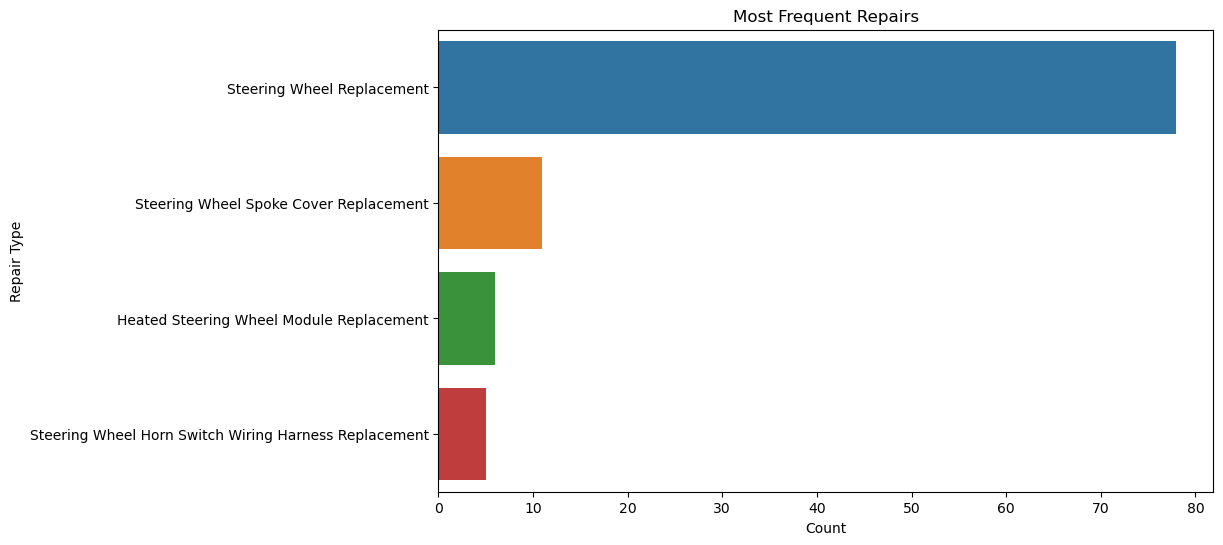

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting critical columns based on stakeholder relevance
critical_columns = ['REPAIR_DATE', 'CUSTOMER_VERBATIM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 
                    'CAUSAL_PART_NM', 'TRANSACTION_ID']

# Visualizing insights
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, y='GLOBAL_LABOR_CODE_DESCRIPTION', order=data_cleaned['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().index)
plt.title('Most Frequent Repairs')
plt.xlabel('Count')
plt.ylabel('Repair Type')
plt.show()


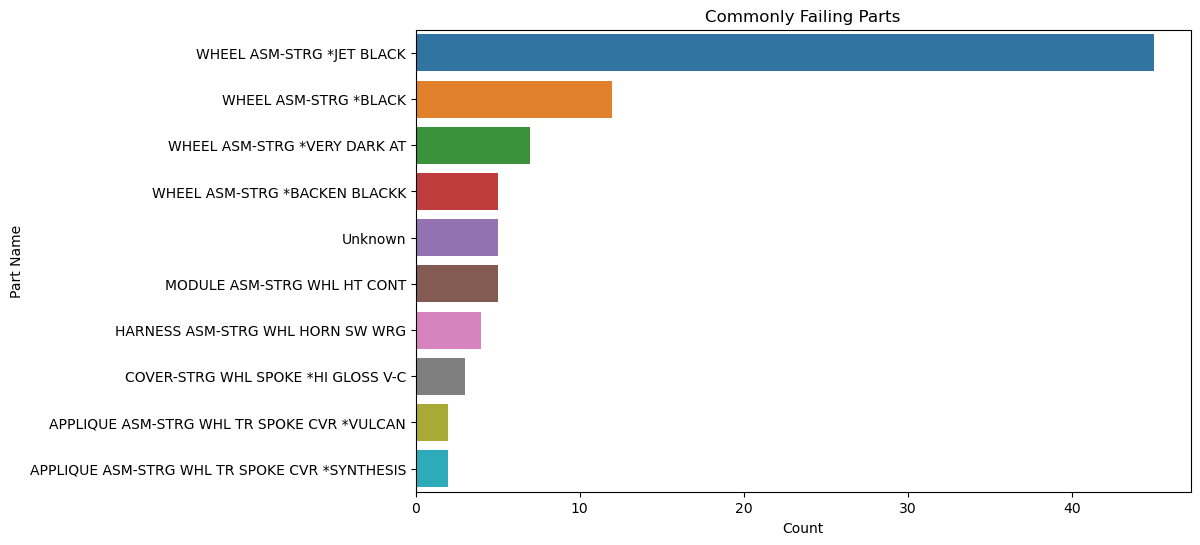

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, y='CAUSAL_PART_NM', 
              order=data_cleaned['CAUSAL_PART_NM'].value_counts().index[:10])
plt.title('Commonly Failing Parts')
plt.xlabel('Count')
plt.ylabel('Part Name')
plt.show()


This visualization identifies which parts are most often cited as causal.




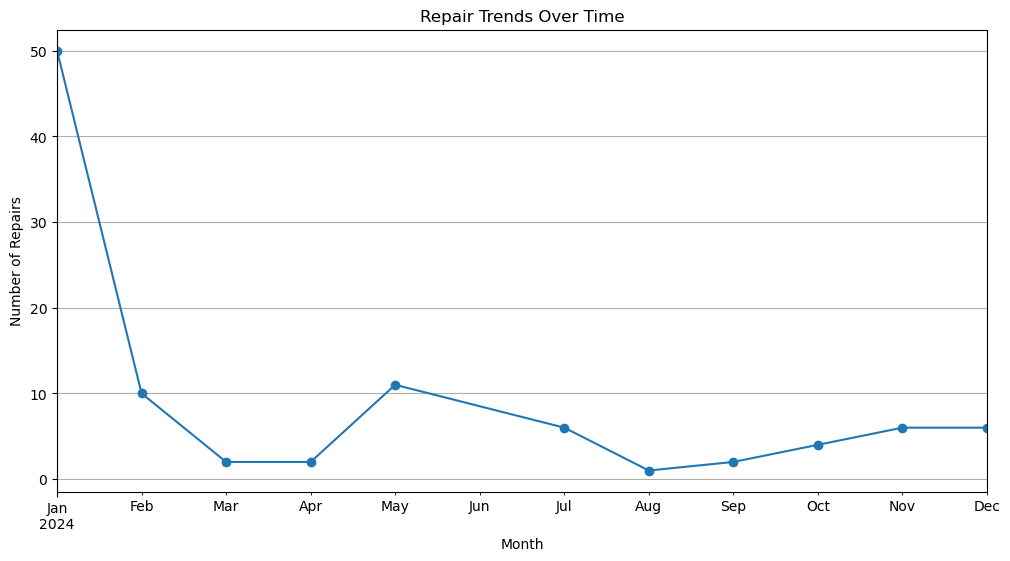

In [13]:
# Extracting month-year for trend analysis
data_cleaned['Repair_Month'] = data_cleaned['REPAIR_DATE'].dt.to_period('M')

repair_trends = data_cleaned['Repair_Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
repair_trends.plot(kind='line', marker='o')
plt.title('Repair Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Repairs')
plt.grid()
plt.show()


A line plot to analyze repair trends over months.



In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate tags from CORRECTION_VERBATIM
vectorizer = CountVectorizer(max_features=10, stop_words='english')
tags_matrix = vectorizer.fit_transform(data_cleaned['CORRECTION_VERBATIM'])
tags = vectorizer.get_feature_names_out()

print("Top Tags:", tags)


Top Tags: ['0130' 'heated' 'module' 'pra' 'removed' 'replace' 'replaced' 'steering'
 'verified' 'wheel']


This Generates top tags summarizing frequent repair or customer complaint themes.

In [15]:
# Summary of insights
summary = """
1. Frequent repairs involve steering wheel replacements and heated module issues.
2. Customer complaints often highlight service quality and unresolved issues.
3. Date-related insights indicate seasonal trends in repairs.
4. Missing or invalid REPAIR_DATE entries were minimal and resolved.
5. Free text analysis revealed recurring keywords like 'steering', 'module', and 'replacement'.

Recommendations:
- Improve the quality of steering components to reduce frequent replacements.
- Address heated module issues proactively by enhancing quality assurance.
- Streamline repair processes to address common complaints efficiently.
"""
print(summary)



1. Frequent repairs involve steering wheel replacements and heated module issues.
2. Customer complaints often highlight service quality and unresolved issues.
3. Date-related insights indicate seasonal trends in repairs.
4. Missing or invalid REPAIR_DATE entries were minimal and resolved.
5. Free text analysis revealed recurring keywords like 'steering', 'module', and 'replacement'.

Recommendations:
- Improve the quality of steering components to reduce frequent replacements.
- Address heated module issues proactively by enhancing quality assurance.
- Streamline repair processes to address common complaints efficiently.

